In [10]:
pip install tensorflowjs

Note: you may need to restart the kernel to use updated packages.


In [11]:
#Importing Libraries
import os
import numpy as np
#import tensorflowjs
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from gettext import install

In [12]:
# from google.colab import drive
# drive.mount('/content/drive')

In [13]:
# data_dir='/content/drive/MyDrive/butterflyml/Butterfly/butterfly_photos/'
# print(data_dir)
data_dir='C:/Users/jerwin/Documents/GitHub/butterfly_photos/larval diseases/train'
print(data_dir)

C:/Users/jerwin/Documents/GitHub/butterfly_photos/larval diseases/train


In [14]:
data_dir=tf.keras.preprocessing.image_dataset_from_directory(data_dir)

Found 284 files belonging to 3 classes.


In [15]:
count = 0
dirs = os.listdir('C:/Users/jerwin/Documents/GitHub/butterfly_photos/larval diseases/train/')
for dir in dirs:
    files = list(os.listdir('C:/Users/jerwin/Documents/GitHub/butterfly_photos/larval diseases/train/'+dir))
    print( dir +' Folder has '+ str(len(files)) + 'C:/Users/jerwin/Documents/GitHub/butterfly_photos/larval diseases/train/')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + 'C:/Users/jerwin/Documents/GitHub/butterfly_photos/larval diseases/train/')

Anaphylaxis Infection Folder has 88C:/Users/jerwin/Documents/GitHub/butterfly_photos/larval diseases/train/
Gnathostomiasis Folder has 91C:/Users/jerwin/Documents/GitHub/butterfly_photos/larval diseases/train/
Nucleopolyhedrosis Folder has 105C:/Users/jerwin/Documents/GitHub/butterfly_photos/larval diseases/train/
Images Folder has 284C:/Users/jerwin/Documents/GitHub/butterfly_photos/larval diseases/train/


In [16]:
base_dir = 'C:/Users/jerwin/Documents/GitHub/butterfly_photos/larval diseases/train/'
img_size = 180
batch = 32

In [17]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 284 files belonging to 3 classes.
Using 228 files for training.
Found 284 files belonging to 3 classes.
Using 56 files for validation.


In [18]:
larval_disease_names = train_ds.class_names
larval_disease_names

['Anaphylaxis Infection', 'Gnathostomiasis', 'Nucleopolyhedrosis']

In [19]:
import matplotlib.pyplot as plt

In [ ]:
print(len(train_ds))
for element in train_ds.take(1):
    print(element)


8


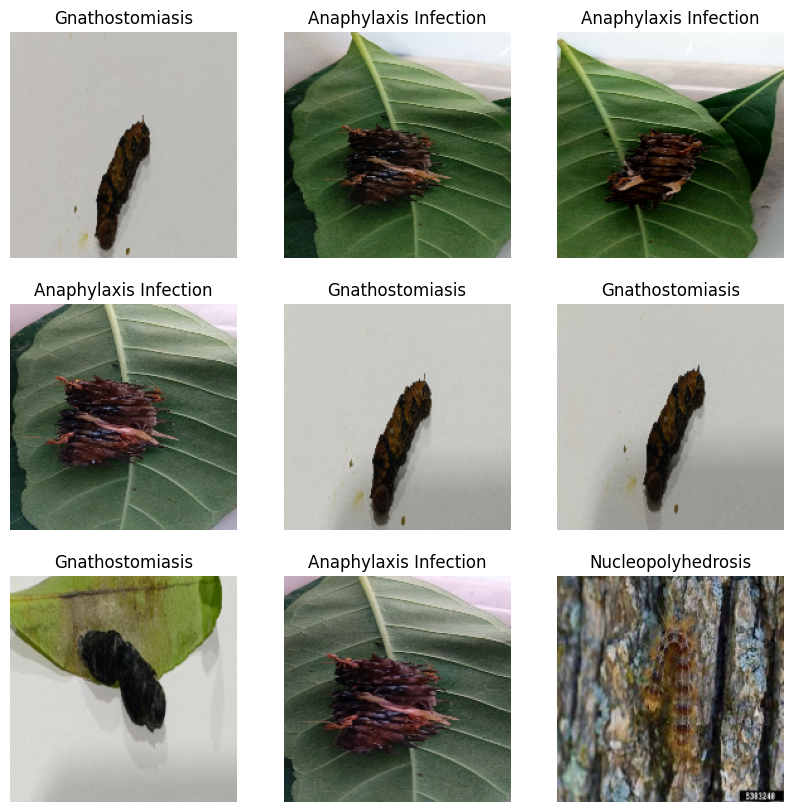

In [ ]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(larval_disease_names[labels[i]])
        plt.axis('off')

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [ ]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

##Data AUgmentation

In [ ]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

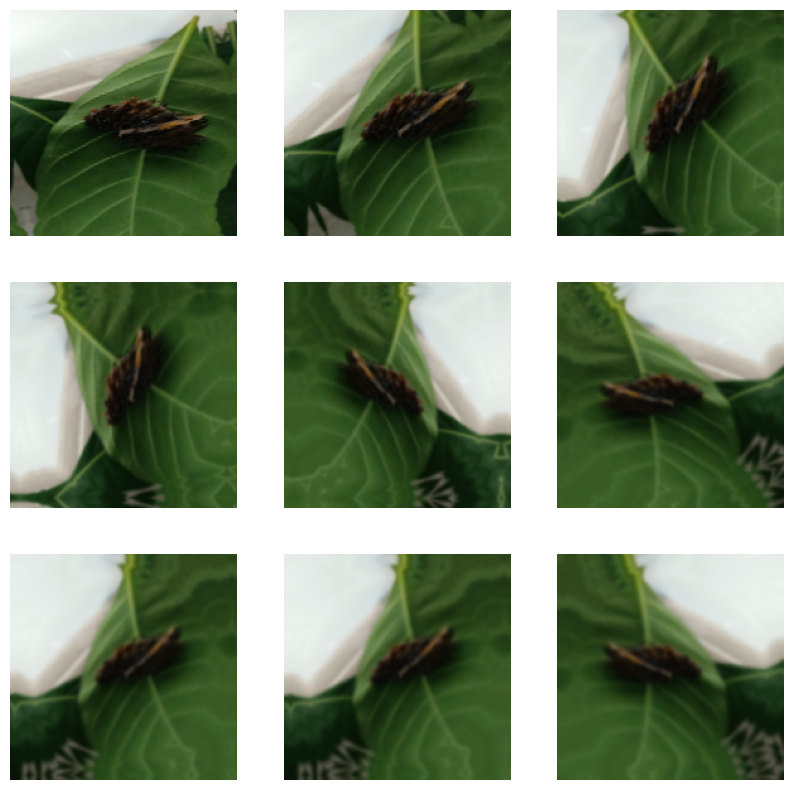

In [ ]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

##Model Creation

In [ ]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(18)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [ ]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15


4/4 [==============================] - 2s 284ms/step - loss: 1.7788 - accuracy: 0.2736 - val_loss: 0.6696 - val_accuracy: 0.6154
Epoch 2/15
4/4 [==============================] - 1s 173ms/step - loss: 0.5372 - accuracy: 0.7830 - val_loss: 0.2634 - val_accuracy: 0.9615
Epoch 3/15
4/4 [==============================] - 1s 160ms/step - loss: 0.2221 - accuracy: 0.9528 - val_loss: 0.1260 - val_accuracy: 0.9615
Epoch 4/15
4/4 [==============================] - 1s 131ms/step - loss: 0.1246 - accuracy: 0.9528 - val_loss: 0.2161 - val_accuracy: 0.9231
Epoch 5/15
4/4 [==============================] - 1s 148ms/step - loss: 0.1058 - accuracy: 0.9811 - val_loss: 0.0581 - val_accuracy: 0.9615
Epoch 6/15
4/4 [==============================] - 1s 171ms/step - loss: 0.1971 - accuracy: 0.9340 - val_loss: 0.0167 - val_accuracy: 1.0000
Epoch 7/15
4/4 [==============================] - 1s 135ms/step - loss: 0.0607 - accuracy: 0.9717 - val_loss: 0.0304 - val_accuracy: 1.0000
Epoch 8/15
4/4 [==

In [ ]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + larval_disease_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [ ]:
classify_images('C:/Users/jerwin/Documents/GitHub/butterfly_photos/larval diseases/test/Nucleopolyhedrosis/Nucleopolyhedrosis_images2.jpg')

1/1 [==============================] - 1s 598ms/step


'The Image belongs to Nucleopolyhedrosis with a score of 99.94648098945618'

In [ ]:
model.save('C:/Users/jerwin/Documents/GitHub/butterfly_photos/model/model_Laval_Diseases.keras')

In [ ]:
model.save('C:/Users/jerwin/Documents/GitHub/butterfly_photos/model/model_Larval_Diseases.h5')

c:\Users\jerwin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = load_model('C:/Users/jerwin/Documents/GitHub/butterfly_photos/model/model_Larval_Diseases.h5')


In [ ]:
# Check the loaded model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [ ]:
# Save the model architecture to a JSON file
model_json = model.to_json()
with open("C:/Users/jerwin/Documents/GitHub/butterfly_photos/model/json/larvae_disease.json", "w") as json_file:
    json_file.write(model_json)


In [ ]:
from tensorflow.keras.models import load_model


In [ ]:
model = load_model('C:/Users/jerwin/Documents/GitHub/butterfly_photos/model/model_Larval_Diseases.h5')

In [ ]:
# Save the model architecture to a JSON file
model_json = model.to_json()
with open("C:/Users/jerwin/Documents/GitHub/butterfly_photos/model/json/Architecture_larval_disease.json", "w") as json_file:
    json_file.write(model_json)
